In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymongo as mongo
import json

In [9]:
def get_data(keyword):
    myclient = mongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient["Storm"]
    mycol = mydb["Responses"]
    x = mycol.find({"keyword":keyword})
    return x

In [10]:
def draw_graph(x,y):
    for i in y:
        plt.plot(x[i],y[i],marker = 'o')
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Tuples Processed / Second')
    plt.title('Tuples Processed ')
    plt.show()

In [11]:
def get_wordcount_tuples(response):
    arr = response["bolts"]
    for i in arr:
        if i["boltId"] == "count":
            return i["executed"]
    return 0

def get_exclaimation_tuples(response):
    arr = response["bolts"]
    for i in arr:
        if i["boltId"] == "exclaim2":
            return i["executed"]
    return 0

In [12]:
def get_uptime(response):
    return response["uptimeSeconds"]

In [15]:
def main():
    topology = 0
    print("Press 1 for wordcount")
    print("Press 2 for exclaimation")
    topology = input("Enter:")
    keyword = input("Please enter keyword:")

    data = get_data(keyword)

    time = {}
    tuples = {}

    intial_time = 0
    if topology == "1":
        for i in data:
            response_str = i["Response"]    
            response = json.loads(response_str)
            
            if i["jobID"] not in tuples:
                tuples[i["jobID"]] = []
                time[i["jobID"]] = []
                initial_time = get_uptime(response)
                
            tuples[i["jobID"]].append(get_wordcount_tuples(response))
            time[i["jobID"]].append(get_uptime(response)-initial_time)
    elif topology == "2":
        for i in data:
            response_str = i["Response"]    
            response = json.loads(response_str)
            
            if i["jobID"] not in tuples:
                tuples[i["jobID"]] = []
                time[i["jobID"]] = []
                initial_time = get_uptime(response)
            
            tuples[i["jobID"]].append(get_exclaimation_tuples(response))
            time[i["jobID"]].append(get_uptime(response)-initial_time)

    draw_graph(time,tuples)

Press 1 for wordcount
Press 2 for exclaimation
Enter:1
Please enter keyword:zoom


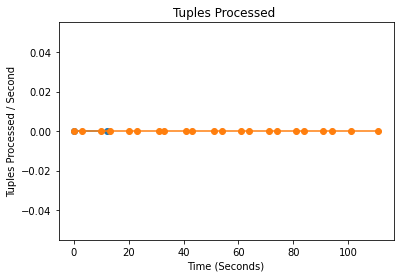

In [16]:
main()